<a href="https://colab.research.google.com/github/GladwelWanjau/Week-13-Moringa-Datascience-Core-IP/blob/main/Week_13_IP_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem
The research problem in this project is to find out the customer behaviours of Kila Plastinina;a Russian brand based on the data provided on the customers browsing behaviours which will inform the marketing and sales strategies to be taken by the brand.

# Understanding the Context
Kira Plastinina is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines[1] and Armenia.[2]

Plastinina was born in Moscow. Her father, Sergei Plastinin, founded Wimm-Bill-Dann Foods OJSC in 1992 and served as its Chief Executive Officer until April 3, 2006. He was impressed with his daughter's passion for design and vision of teenage fashion, and suggested that they launch a fashion brand together. In 2007, the first Kira Plastinina store opened in Moscow, Plastinina introduced her first collection and became one of the youngest fashion designers in the world. Since then, the company has opened over 300 stores in Russia and CIS. In 2008, the Company made an unsuccessful attempt to enter the U.S. market. The U.S. entity eventually filed for bankruptcy. 

# Data Relevance 
The data availed indicates the customer behaviours and has the following characteristics:

1. The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
2. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
3. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
4. The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
5. The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
6. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
7. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
8. The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



# Experimental Design
1.Data Loading and Cleaning
2. Exploratory Analysis-Univariate,Bivariate and Multivariate.
3. Implementing the Solution-Clustering
4. Challenging the solution
5. Making Conclusions and Recommendations to the Company.

# Data Loading and Cleaning

In [ ]:
!jupyter-kernelspec list

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [ ]:
# activating R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
#Importing the data
online_shoppers =read.csv('http://bit.ly/EcommerceCustomersDataset',header = TRUE,
                 sep = ",",fileEncoding = "UTF-8-BOM")
head(online_shoppers)


  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                      -1             0                     -1
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1               -1.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
#Importing the tidyverse library
library(tidyverse)

In [ ]:
#Converting the data into a tibble for easy analysis
%%R
my_data<-as_tibble(online_shoppers)
my_data

# A tibble: 12,330 x 18
   Administrative Administrative_… Informational Informational_D… ProductRelated
            <int>            <dbl>         <int>            <dbl>          <int>
 1              0                0             0                0              1
 2              0                0             0                0              2
 3              0               -1             0               -1              1
 4              0                0             0                0              2
 5              0                0             0                0             10
 6              0                0             0                0             19
 7              0               -1             0               -1              1
 8              1               -1             0               -1              1
 9              0                0             0                0              2
10              0                0             0                0              3
# … 

In [ ]:
#Checking the structure of the data
#The data types is a mixture of numeric and character.
%%R
str(my_data)

tibble [12,330 × 18] (S3: tbl_df/tbl/data.frame)
 $ Administrative         : int [1:12330] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int [1:12330] 1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num [1:12330] 0 64 -1 2.67 627.5 ...
 $ BounceRates            : num [1:12330] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12330] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12330] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr [1:12330] "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int [1:12330] 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int [1:12330] 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int [1:12330] 1 1 9 2 1 1 3 1 2 1 ...
 $ Traff

In [ ]:
#Checking for missing values using the complete function
%%R
my_data[!complete.cases(my_data),]
#There are so many identified missing values in the following columns; Administrative,Administrative_Duration,Informational,Informational_Duration and Product_Related.

# A tibble: 14 x 18
   Administrative Administrative_… Informational Informational_D… ProductRelated
            <int>            <dbl>         <int>            <dbl>          <int>
 1             NA               NA            NA               NA             NA
 2             NA               NA            NA               NA             NA
 3             NA               NA            NA               NA             NA
 4             NA               NA            NA               NA             NA
 5             NA               NA            NA               NA             NA
 6             NA               NA            NA               NA             NA
 7             NA               NA            NA               NA             NA
 8             NA               NA            NA               NA             NA
 9             NA               NA            NA               NA             NA
10             NA               NA            NA               NA             NA
11      

In [ ]:
%%R
#Rechecking the sum of missing values to ascertain the above finding
colSums(is.na(my_data))
#A further analysis into the sum of the missing values indicate that 14 rows have missing values in stated columns hence easy to drop these rows.
#

         Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0 


In [ ]:
#Dropping the missing columns
%%R
na.omit(my_data)

# A tibble: 12,316 x 18
   Administrative Administrative_… Informational Informational_D… ProductRelated
            <int>            <dbl>         <int>            <dbl>          <int>
 1              0                0             0                0              1
 2              0                0             0                0              2
 3              0               -1             0               -1              1
 4              0                0             0                0              2
 5              0                0             0                0             10
 6              0                0             0                0             19
 7              0               -1             0               -1              1
 8              1               -1             0               -1              1
 9              0                0             0                0              2
10              0                0             0                0              3
# … 

In [ ]:
%%R
#Pulling out numerical columns
Numeric=my_data %>% select_if(is.numeric)
Numeric

# A tibble: 12,330 x 14
   Administrative Administrative_… Informational Informational_D… ProductRelated
            <int>            <dbl>         <int>            <dbl>          <int>
 1              0                0             0                0              1
 2              0                0             0                0              2
 3              0               -1             0               -1              1
 4              0                0             0                0              2
 5              0                0             0                0             10
 6              0                0             0                0             19
 7              0               -1             0               -1              1
 8              1               -1             0               -1              1
 9              0                0             0                0              2
10              0                0             0                0              3
# … 

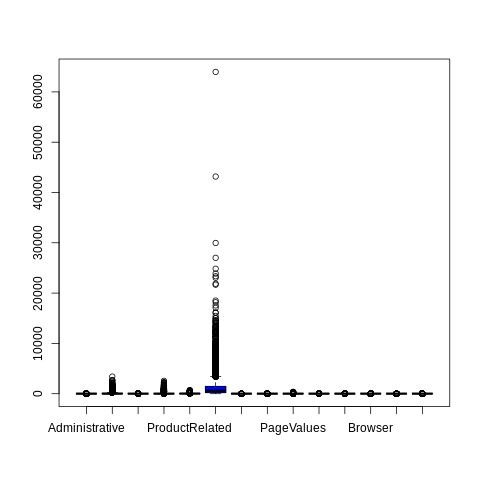

In [ ]:
%%R
#Checking for outliers
boxplot(Numeric,col="blue")
#There are mant outliers most of which are related with the productRelated column \
#This is expected as most of the clients visit the product related pages and take different times hence the huge variance.

# Univariate Analysis

# 1.Numerical Analysis

In [ ]:
%%R
#Getting the summary statistics of the numeric data
summary(Numeric)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [ ]:
#Finding the mode
%%R
v<-my_data %>% pull(Administrative)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Administrative.Mode<-getmode(my_data$Administrative)
Administrative.Mode

[1] 0


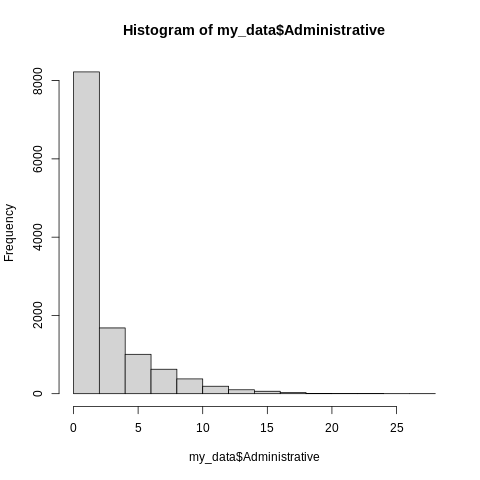

In [ ]:
%%R
hist(my_data$Administrative)

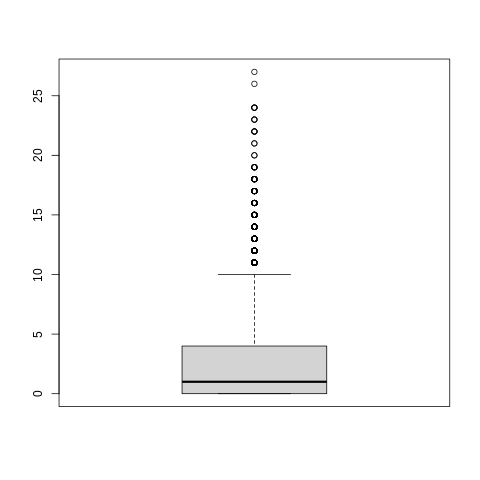

In [ ]:
%%R
boxplot(my_data$Administrative)

In [ ]:
%%R
v<-my_data %>% pull(Administrative_Duration)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Administrative_Duration.Mode<-getmode(my_data$Administrative_Duration)
Administrative_Duration.Mode

[1] 0


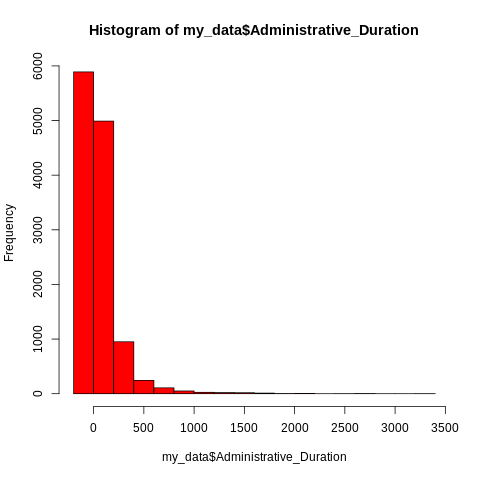

In [ ]:
%%R
hist(my_data$Administrative_Duration,col="red")

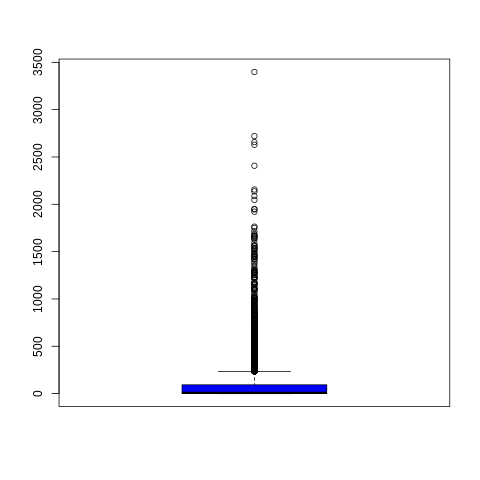

In [ ]:
%%R
boxplot(my_data$Administrative_Duration,col="blue")

In [ ]:
%%R
v<-my_data %>% pull(Informational)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Informational.Mode<-getmode(my_data$Informational)
Informational.Mode

[1] 0


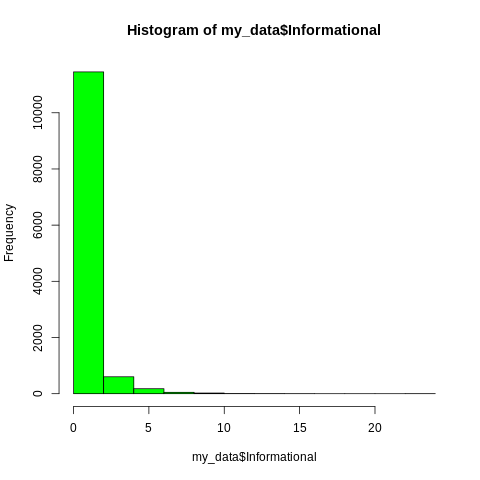

In [ ]:
%%R
hist(my_data$Informational,col="green")

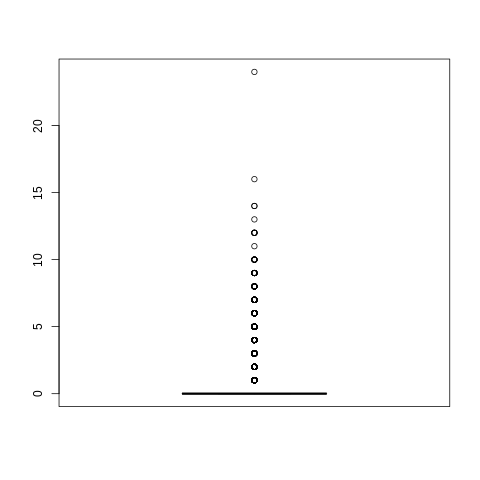

In [ ]:
%%R
boxplot(my_data$Informational,col="green")

In [ ]:
%%R
v<-my_data %>% pull(Informational_Duration)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Info_Duration.Mode<-getmode(my_data$Informational_Duration)
Info_Duration.Mode

[1] 0


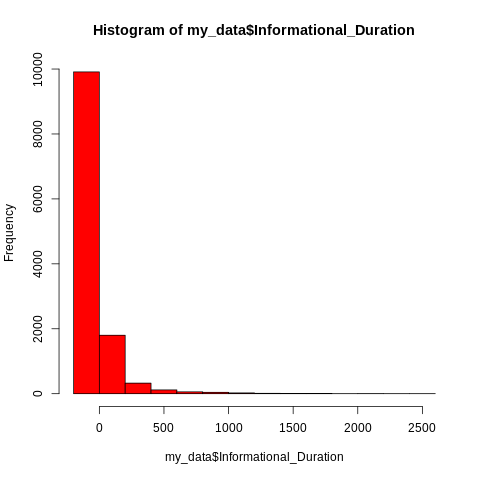

In [ ]:
%%R
hist(my_data$Informational_Duration,col="red")

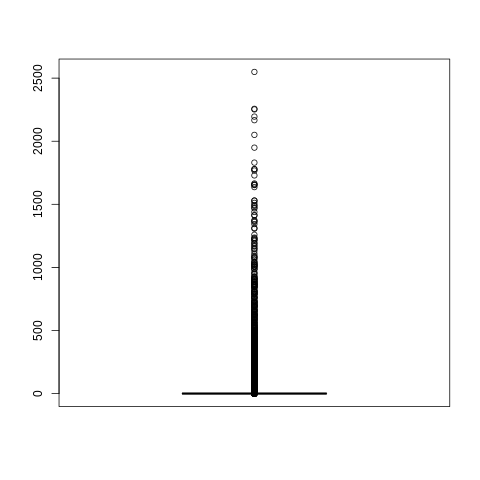

In [ ]:
%%R
boxplot(my_data$Informational_Duration,col="red")

In [ ]:
%%R
v<-my_data %>% pull(ProductRelated)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Product_Related.Mode<-getmode(my_data$ProductRelated)
Product_Related.Mode

[1] 1


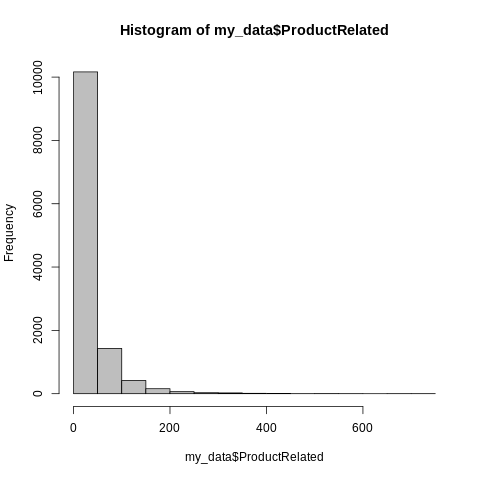

In [ ]:
%%R
hist(my_data$ProductRelated,col="grey")

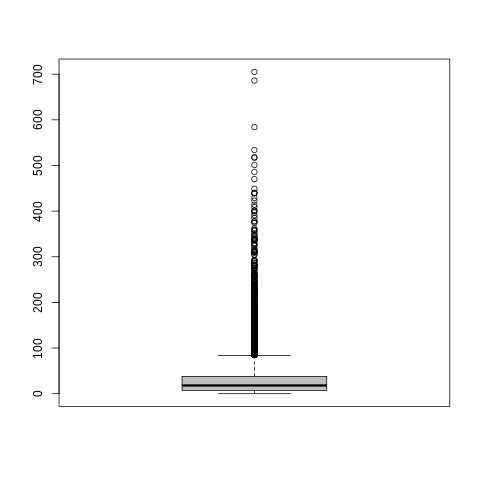

In [ ]:
%%R
boxplot(my_data$ProductRelated,col="grey")


In [ ]:
%%R
v<-my_data %>% pull(ProductRelated_Duration)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Product_Duration.Mode<-getmode(my_data$ProductRelated_Duration)
Product_Duration.Mode

[1] 0


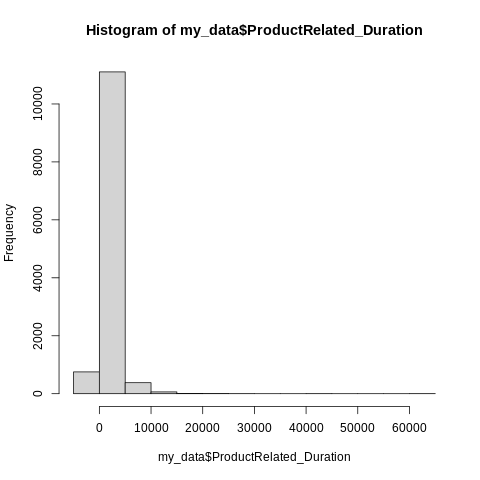

In [ ]:
%%R
hist(my_data$ProductRelated_Duration)

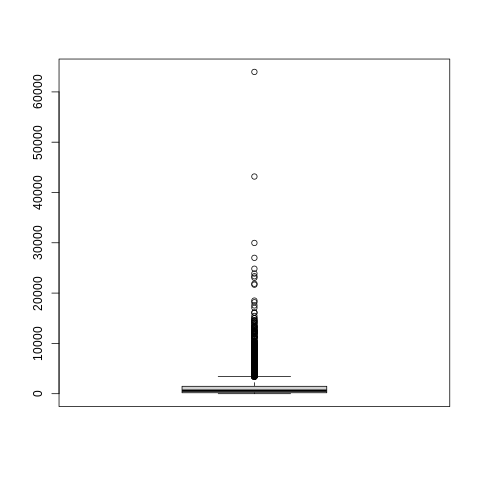

In [ ]:
%%R
boxplot(my_data$ProductRelated_Duration)

In [ ]:
%%R
v<-my_data %>% pull(BounceRates)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Bounce_Rates.Mode<-getmode(my_data$BounceRates)
Bounce_Rates.Mode

[1] 0


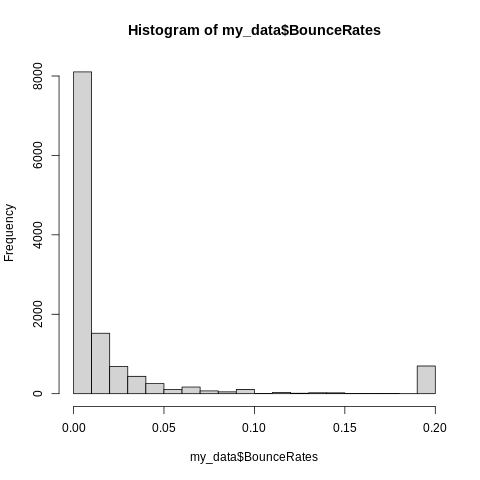

In [ ]:
%%R
hist(my_data$BounceRates)

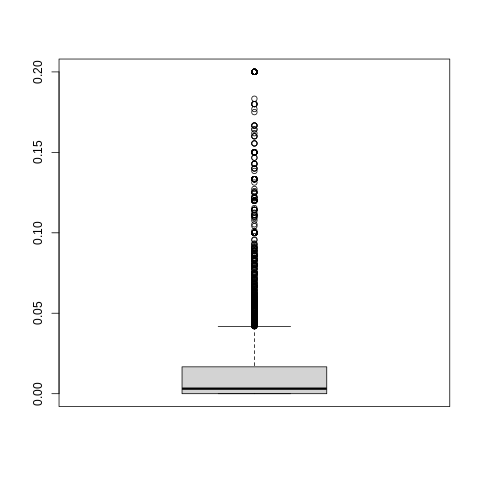

In [ ]:
%%R
boxplot(my_data$BounceRates)

In [ ]:
%%R
v<-my_data %>% pull(ExitRates)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
ExitRates.Mode<-getmode(my_data$ExitRates)
ExitRates.Mode

[1] 0.2


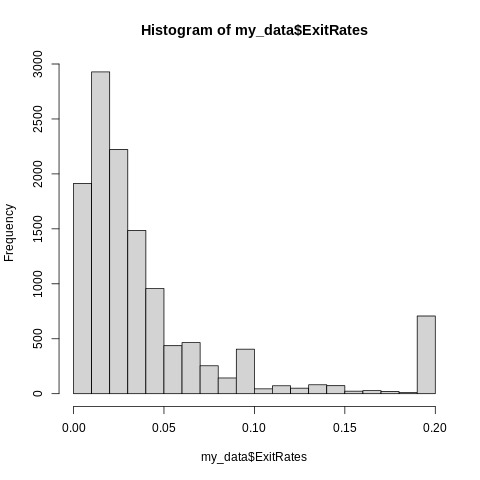

In [ ]:
%%R
hist(my_data$ExitRates)

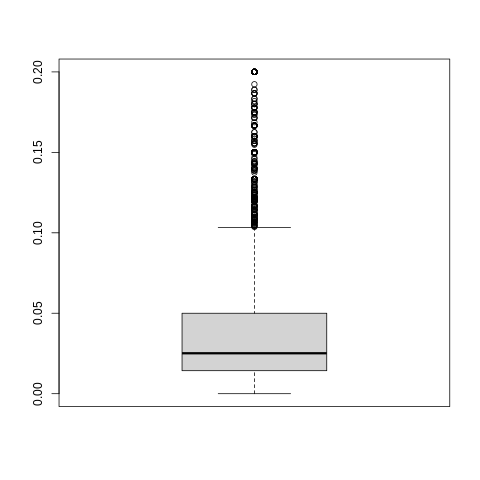

In [ ]:
%%R
boxplot(my_data$ExitRates)

In [ ]:
%%R
v<-my_data %>% pull(PageValues)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Page_Values.Mode<-getmode(my_data$PageValues)
Page_Values.Mode

[1] 0


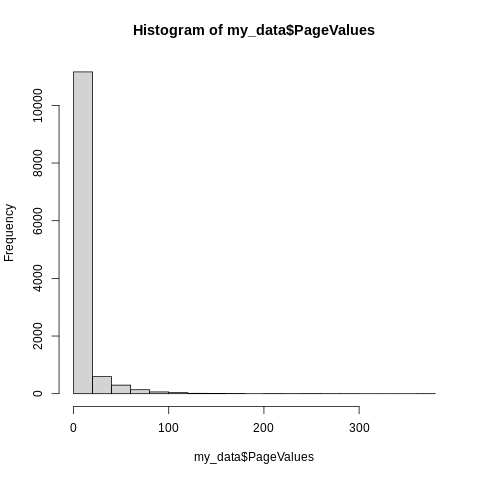

In [ ]:
%%R
hist(my_data$PageValues)

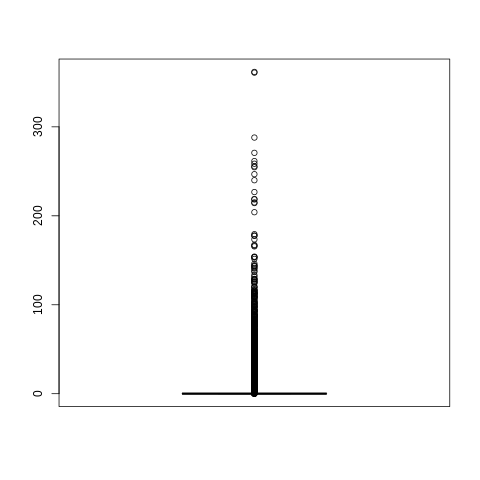

In [ ]:
%%R
boxplot(my_data$PageValues)

In [ ]:
%%R
v<-my_data %>% pull(SpecialDay)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
SpecialDay.Mode<-getmode(my_data$SpecialDay)
SpecialDay.Mode

[1] 0


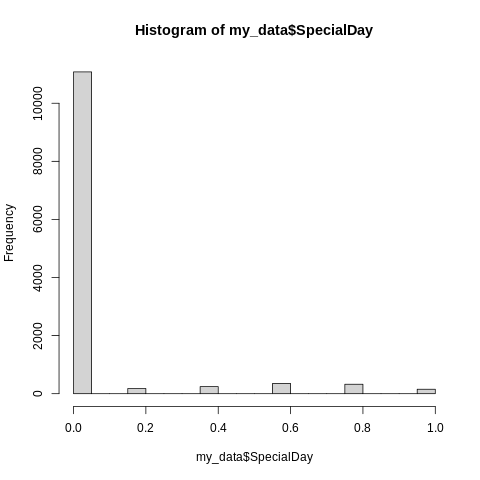

In [ ]:
%%R
hist(my_data$SpecialDay)

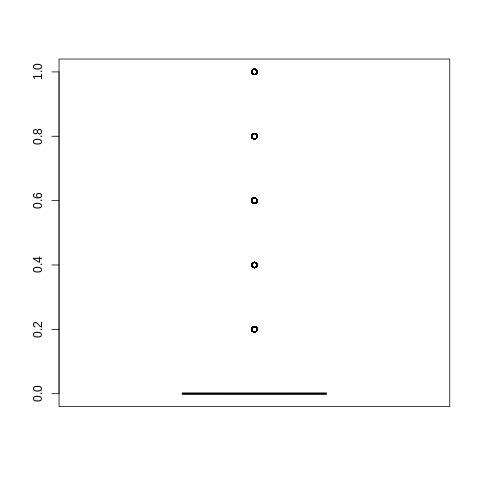

In [ ]:
%%R
boxplot(my_data$SpecialDay)

In [ ]:
%%R
v<-my_data %>% pull(OperatingSystems)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
OS.Mode<-getmode(my_data$OperatingSystems)
OS.Mode

[1] 2


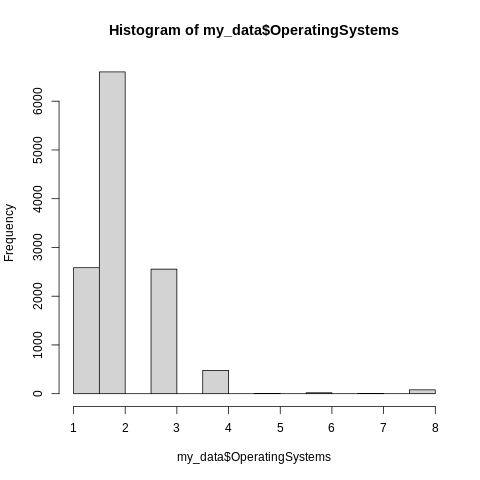

In [ ]:
%%R
hist(my_data$OperatingSystems)

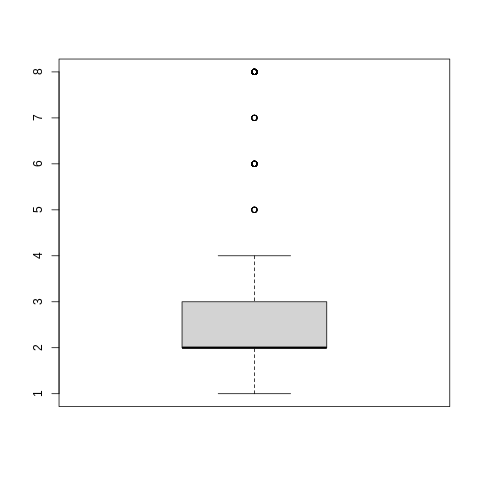

In [ ]:
%%R
boxplot(my_data$OperatingSystems)

In [ ]:
%%R
v<-my_data %>% pull(Browser)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
Browser.Mode<-getmode(my_data$Browser)
Browser.Mode

[1] 2


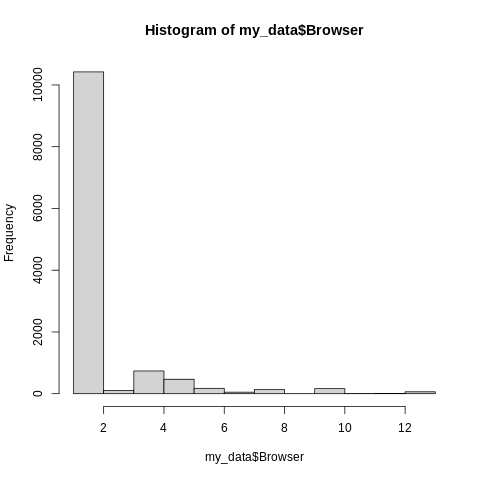

In [ ]:
%%R
hist(my_data$Browser)

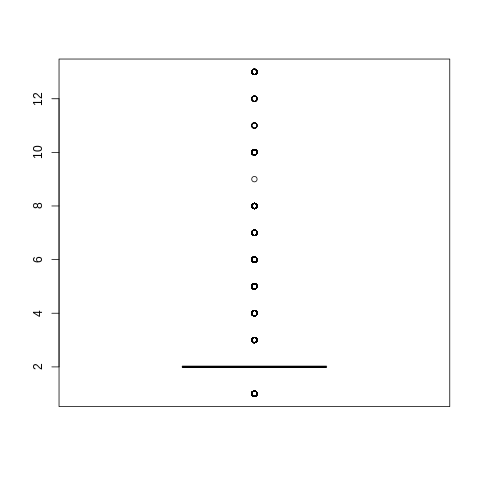

In [ ]:
%%R
boxplot(my_data$Browser)

In [ ]:
%%R
v<-my_data %>% pull(Region)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
R.Mode<-getmode(my_data$Region)
R.Mode

[1] 1


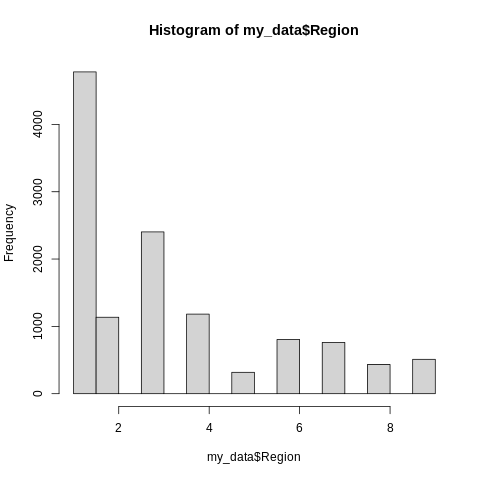

In [ ]:
%%R
hist(my_data$Region)

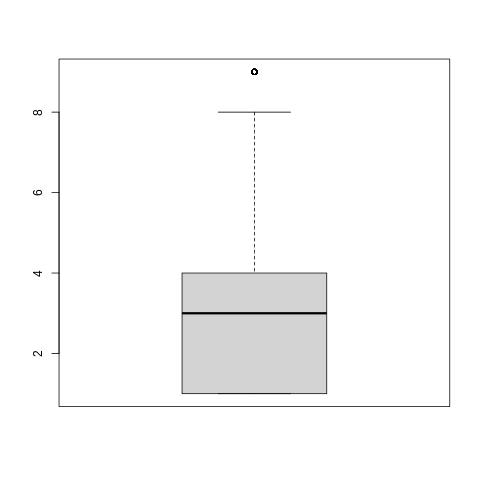

In [ ]:
%%R
boxplot(my_data$Region)

In [ ]:
%%R
v<-my_data %>% pull(TrafficType)
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
TT.Mode<-getmode(my_data$TrafficType)
TT.Mode

[1] 2


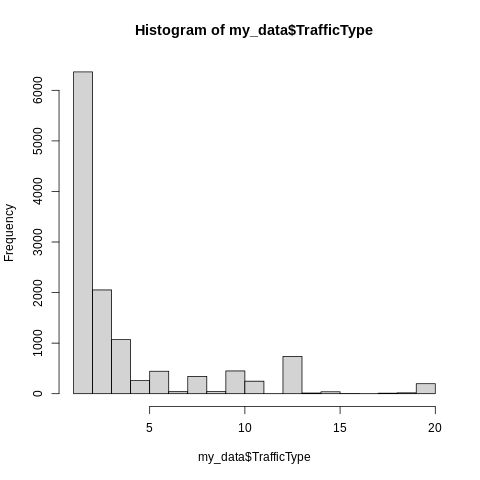

In [ ]:
%%R
hist(my_data$TrafficType)

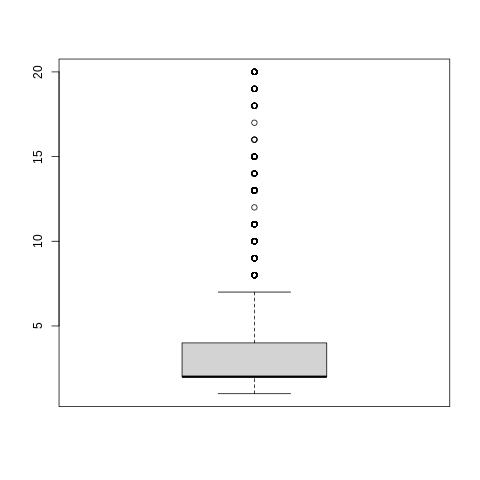

In [ ]:
%%R
boxplot(my_data$TrafficType)

From the analysis it is clear that none of the numeric columns is normally distributed and there is presence of outliers in the data.

#2.Categorical Values

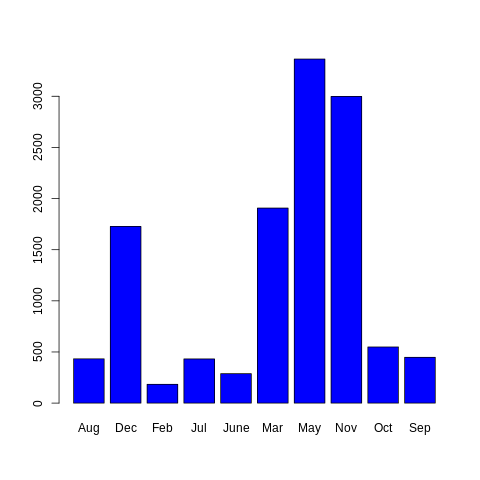

In [ ]:
%%R
Month<- my_data$Month
Month_frequency<- table(Month)
Month_frequency
barplot(Month_frequency,col="Blue")

From the barplot it is clear that most of the site vistis are made in May and Novemeber hence these should be the priority months in terms of marketing in the organization.
The top 5 months are as follows:
1. May
2. Novemeber
3. March
4. December
5. October.

The Organization should seek to establish religious and cultural events that occur in these months in the different branches such as Christmas,etc and capitalize in using them in their marketing. 


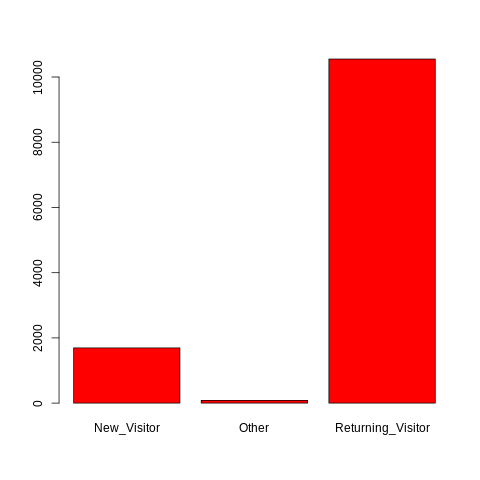

In [ ]:
%%R
VisitorType <- my_data$VisitorType
VisitorType_frequency<- table(VisitorType)
VisitorType_frequency
barplot(VisitorType_frequency,col="Red")

From the Analysis,most of the visitors to the site are Returning Visistors an indication that clients are happy with the products and customer service.The organization should therefor look at ways of motivating these returning visitors through loyalty cards that accumulate points over time.

Secondly, the organization should capitalize efforts in finding new clients as this group seems to be lagging behind.This could include more advertisement on the mainstream and social media avenues.Additionally,the organization should look at working with influencers in the different regions.

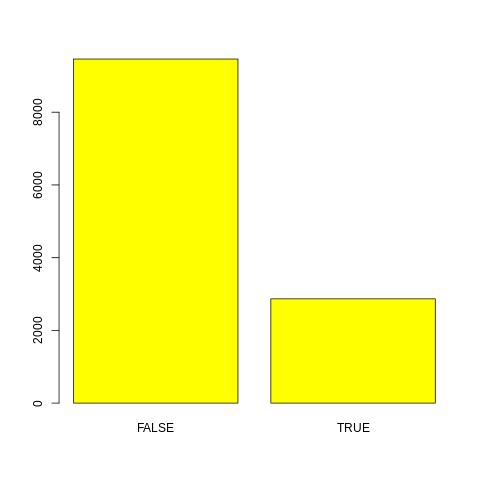

In [ ]:
%%R
Weekend <- my_data$Weekend
Weekend_frequency<- table(Weekend)
Weekend_frequency
barplot(Weekend_frequency,col="Yellow")

From the analysis it is clear that most of the customers visit the sites on week dayas and not on weekends as it is popularly known.The organization should therefore focus on giving discounts and promoting their products on week days.

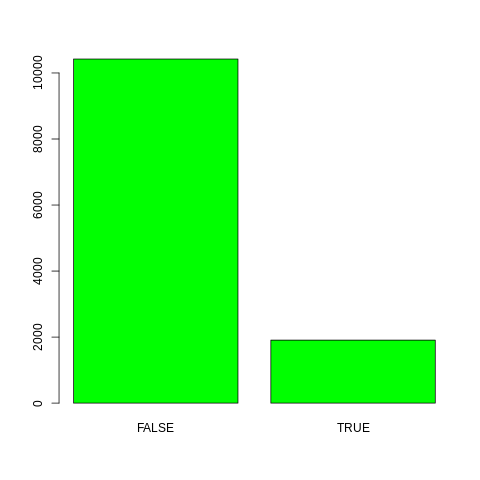

In [ ]:
%%R
Revenue <- my_data$Revenue
Revenue_frequency<- table(Revenue)
Revenue_frequency
barplot(Revenue_frequency,col="Green")

A shocking revelation is revealed by the above plot whereby most of the site visits do not result into revenue.Revenue is the main aim of any business hence the traffic on the site should result into revenue.

Perhaps this is an indication that most people have heard about the brand but when they visit the site the prices are not affordable or the quality of the products is not as expected.The Organization should therefore seek to find out why this is the case;maybe conduct a survey among the individuals who visite the site and did not purchase any product.

Additionally,the organization should consider revamping their website to include pop up questions to direct the customers.

I visited the website and found out that the website is in Russia which put me off in trying to navigate the website as I didn't understand the language.The oranization should therefore customize its website in English so as to attract customers from all over the world.This could be one of the reasons why the the revenue does not resonate with the number of site visits.

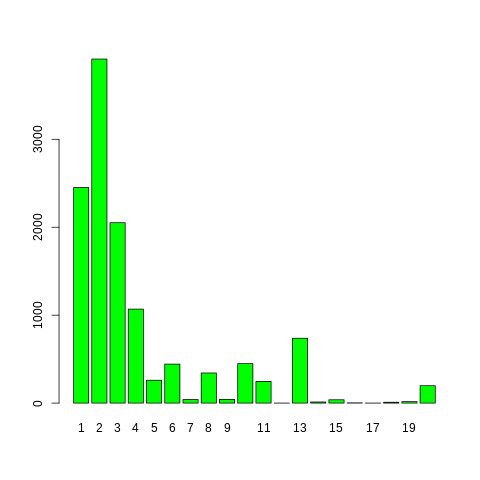

In [ ]:
%%R
Traffic <- my_data$TrafficType
Traffic_frequency<- table(Traffic)
Traffic_frequency
barplot(Traffic_frequency,col="Green")

The most prevalent traffic type is the type 2.The top 5 types are as follows:

1. 2
2. 1
3. 3
4. 4
5. 13

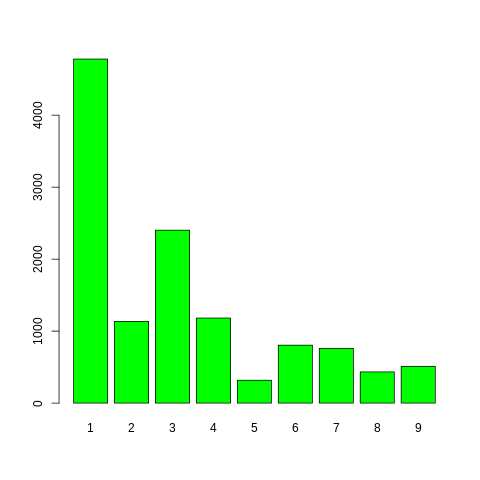

In [ ]:
%%R
Region <- my_data$Region
Region_frequency<- table(Region)
Region_frequency
barplot(Region_frequency,col="Green")

Most of the site visits come from region one foollowed by region 3,region 4,region 2 and region 6.

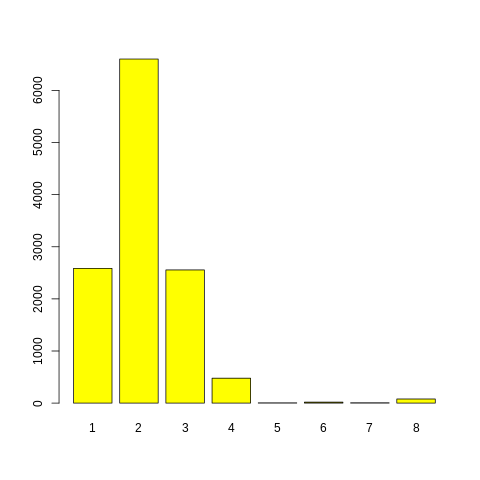

In [ ]:
%%R
OperatingSystems <- my_data$OperatingSystems
OperatingSystems_frequency<- table(OperatingSystems)
OperatingSystems_frequency
barplot(OperatingSystems_frequency,col="Yellow")

Most of the clients have operating system 2.

# Bivariate Analysis

# 1.Covariance

In [ ]:
%%R
cov(Numeric)

                        Administrative Administrative_Duration Informational
Administrative                      NA                      NA            NA
Administrative_Duration             NA                      NA            NA
Informational                       NA                      NA            NA
Informational_Duration              NA                      NA            NA
ProductRelated                      NA                      NA            NA
ProductRelated_Duration             NA                      NA            NA
BounceRates                         NA                      NA            NA
ExitRates                           NA                      NA            NA
PageValues                          NA                      NA            NA
SpecialDay                          NA                      NA            NA
OperatingSystems                    NA                      NA            NA
Browser                             NA                      NA            NA

There are positive covariance relations between the following Variables:
1. Page Values and Opearating Systems
2. Page Values and Browser
3. Page Values and Region
4. Page Values and TrafficType
5. Special Day and Operating Systems
6. Special Day and Browser
7. Special Day and TrafficType
8. Operating Systems and Browser
9. Operating Systems and Region
10. Operating Systems and TrafficType
11. ...etc

The rest indicate negative or no covariance relationships.

# 2.Correlation

In [ ]:
%%R
cor(Numeric)

                        Administrative Administrative_Duration Informational
Administrative                       1                      NA            NA
Administrative_Duration             NA                       1            NA
Informational                       NA                      NA             1
Informational_Duration              NA                      NA            NA
ProductRelated                      NA                      NA            NA
ProductRelated_Duration             NA                      NA            NA
BounceRates                         NA                      NA            NA
ExitRates                           NA                      NA            NA
PageValues                          NA                      NA            NA
SpecialDay                          NA                      NA            NA
OperatingSystems                    NA                      NA            NA
Browser                             NA                      NA            NA

The correlation inicate both negative, positive and no correlations between variables.

In [ ]:
%%R
#Installing the Correlation Plot Library
install.packages("corrplot")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.84.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5385275 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

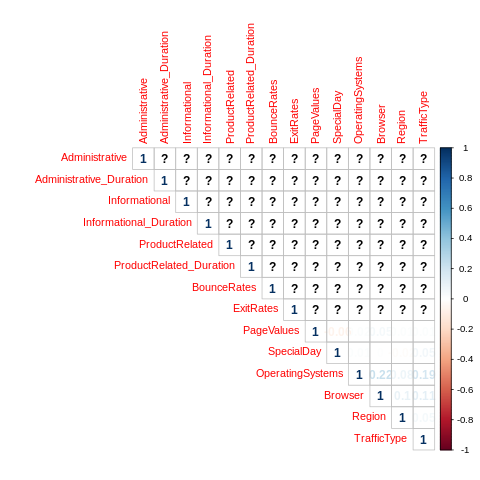

In [ ]:
%%R
library(corrplot)
corrplot(cor(Numeric), type = 'upper', method = 'number', tl.cex = 0.9)

In [ ]:
%%R
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

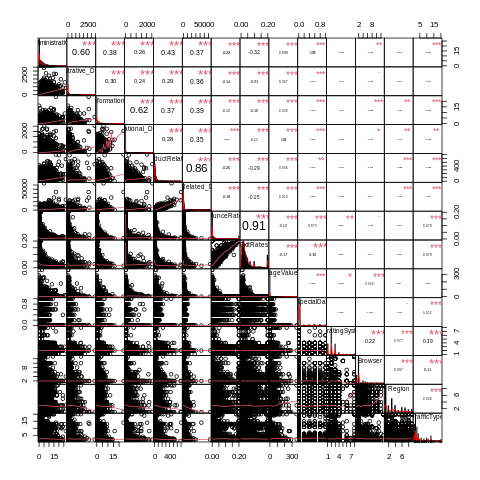

In [ ]:
%%R
chart.Correlation(Numeric, histogram=TRUE, pch=30)

# 3.Scatter Plots

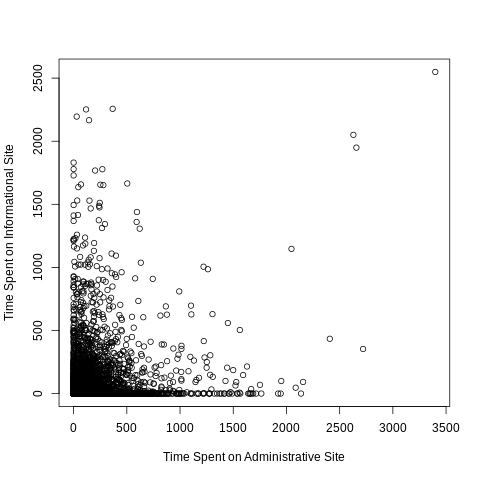

In [ ]:
%%R
ADM_D<-my_data$Administrative_Duration
ADM_D
I_D<-my_data$Informational_Duration
I_D
plot(ADM_D, I_D, xlab="Time Spent on Administrative Site", ylab="Time Spent on Informational Site")


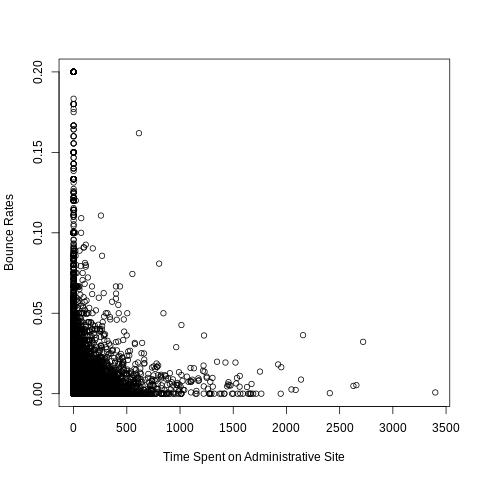

In [ ]:
%%R
ADM_D<-my_data$Administrative_Duration
ADM_D
Bounce<-my_data$BounceRates
Bounce
plot(ADM_D, Bounce, xlab="Time Spent on Administrative Site", ylab="Bounce Rates")

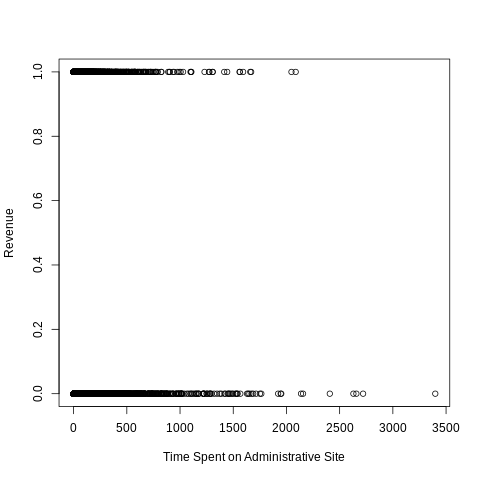

In [ ]:
%%R
Revenue<-my_data$Revenue
Revenue
plot(ADM_D, Revenue, xlab="Time Spent on Administrative Site", ylab="Revenue")

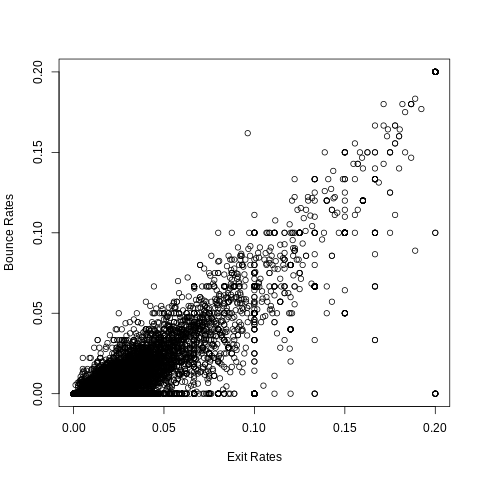

In [ ]:
%%R
Bounce<-my_data$BounceRates
Bounce
Exit<-my_data$ExitRates
Exit
plot(Exit, Bounce, xlab="Exit Rates", ylab="Bounce Rates")
#There is a positive linear relationship between the Exit and Bounce rates

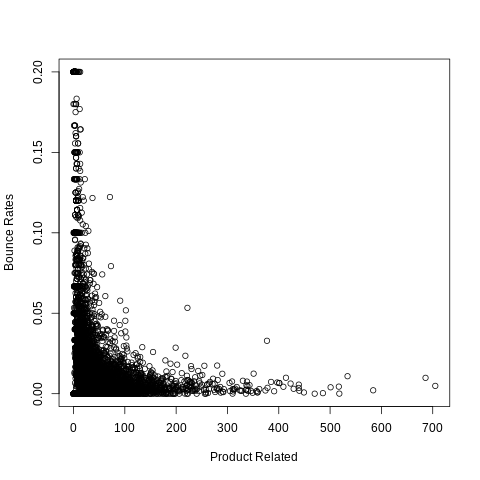

In [ ]:
%%R
Product<-my_data$ProductRelated
Product
plot(Product, Bounce, xlab="Product Related", ylab="Bounce Rates")

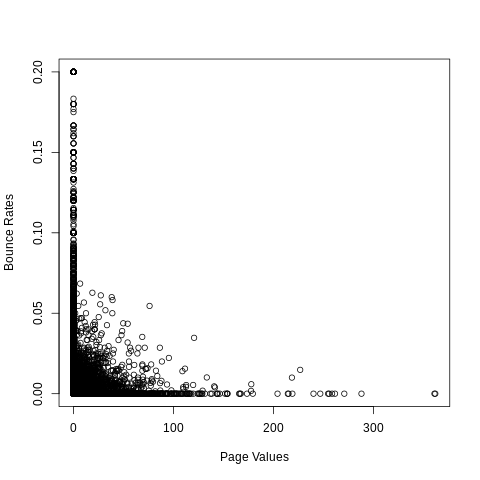

In [ ]:
%%R
Page<-my_data$PageValues
Page
plot(Page, Bounce, xlab="Page Values", ylab="Bounce Rates")

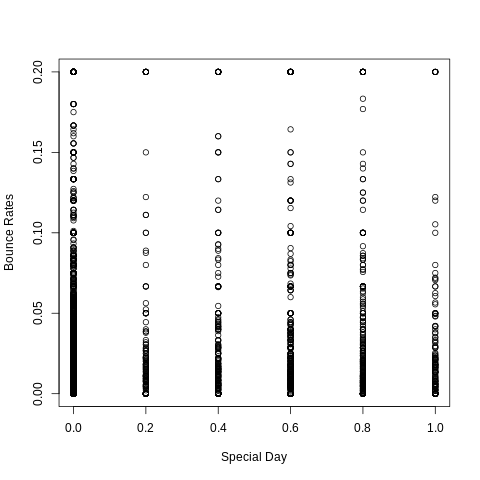

In [ ]:
%%R
Special<-my_data$SpecialDay
Special
plot(Special, Bounce, xlab="Special Day", ylab="Bounce Rates")

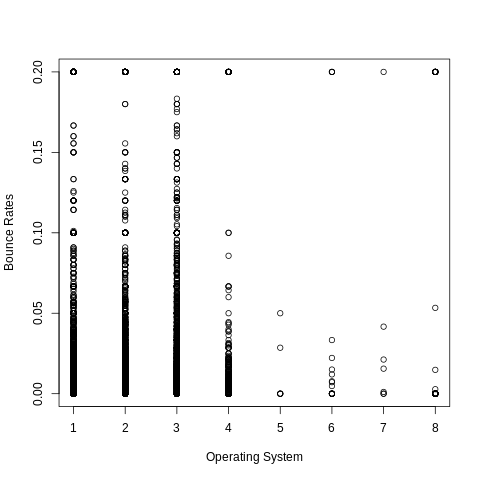

In [ ]:
%%R
OS<-my_data$OperatingSystems
OS
plot(OS, Bounce, xlab="Operating System", ylab="Bounce Rates")

# Implementing the solution

# 1.K-means Clustering

In [ ]:
%%R
my_data.new<-my_data[, c(1:17)]
my_data.class<- my_data[, "Revenue"]
head(my_data.new)


# A tibble: 6 x 17
  Administrative Administrative_… Informational Informational_D… ProductRelated
           <int>            <dbl>         <int>            <dbl>          <int>
1              0                0             0                0              1
2              0                0             0                0              2
3              0               -1             0               -1              1
4              0                0             0                0              2
5              0                0             0                0             10
6              0                0             0                0             19
# … with 12 more variables: ProductRelated_Duration <dbl>, BounceRates <dbl>,
#   ExitRates <dbl>, PageValues <dbl>, SpecialDay <dbl>, Month <chr>,
#   OperatingSystems <int>, Browser <int>, Region <int>, TrafficType <int>,
#   VisitorType <chr>, Weekend <lgl>


In [ ]:
%%R
head(my_data.class)


# A tibble: 6 x 1
  Revenue
  <lgl>  
1 FALSE  
2 FALSE  
3 FALSE  
4 FALSE  
5 FALSE  
6 FALSE  


In [ ]:
%%R
#Scaling the data
my_data_Norm <- as.data.frame(scale(Numeric))
head(my_data_Norm)

  Administrative Administrative_Duration Informational Informational_Duration
1     -0.6975533              -0.4574578    -0.3966145             -0.2450294
2     -0.6975533              -0.4574578    -0.3966145             -0.2450294
3     -0.6975533              -0.4631119    -0.3966145             -0.2521304
4     -0.6975533              -0.4574578    -0.3966145             -0.2450294
5     -0.6975533              -0.4574578    -0.3966145             -0.2450294
6     -0.6975533              -0.4574578    -0.3966145             -0.2450294
  ProductRelated ProductRelated_Duration BounceRates  ExitRates PageValues
1     -0.6914734              -0.6247671  3.67247746  3.2352400  -0.317165
2     -0.6689966              -0.5913358 -0.45743910  1.1745443  -0.317165
3     -0.6914734              -0.6252895  3.67247746  3.2352400  -0.317165
4     -0.6689966              -0.6233742  0.57504004  1.9988226  -0.317165
5     -0.4891823              -0.2969835 -0.04444744  0.1441964  -0.317165
6   

In [ ]:
%%R
set.seed(123)

K5 <- kmeans(my_data_Norm, centers = 5, nstart = 25)
print(K5)
K6 <- kmeans(my_data_Norm, centers = 6, nstart = 25)
k6
K7 <- kmeans(my_data_Norm, centers = 7, nstart = 25)
k7
K8 <- kmeans(my_data_Norm, centers = 8, nstart = 25)
k8
k9<-kmeans(my_data_Norm, centers = 9, nstart = 25)
k9

R[write to console]: Error in do_one(nmeth) : NA/NaN/Inf in foreign function call (arg 1)
Calls: <Anonymous> -> <Anonymous> -> withVisible -> kmeans -> do_one




Error in do_one(nmeth) : NA/NaN/Inf in foreign function call (arg 1)
Calls: <Anonymous> -> <Anonymous> -> withVisible -> kmeans -> do_one


In [ ]:
%%R
plot5 <- fviz_cluster(wines_K5, geom = "point", data = my_data_Norm) + ggtitle(" K = 5")
plot6 <- fviz_cluster(wines_K3, geom = "point", data = my_data_Norm) + ggtitle(" K = 6")
plot7 <- fviz_cluster(wines_K4, geom = "point", data = my_data_Norm) + ggtitle(" K = 7")
plot8 <- fviz_cluster(wines_K5, geom = "point", data = my_data_Norm) + ggtitle(" K = 8")
plot9 <- fviz_cluster(wines_K5, geom = "point", data = my_data_Norm) + ggtitle(" K = 9")

grid.arrange(p5, p6, p7, p8, p9, nrow = 2)


R[write to console]: Error in fviz_cluster(wines_K5, geom = "point", data = my_data_Norm) : 
  could not find function "fviz_cluster"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in fviz_cluster(wines_K5, geom = "point", data = my_data_Norm) : 
  could not find function "fviz_cluster"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
#Determining the optimal k means
fviz_nbclust(x = my_data_Norm,FUNcluster = kmeans, method = 'silhouette' )

R[write to console]: Error in fviz_nbclust(x = my_data_Norm, FUNcluster = kmeans, method = "silhouette") : 
  could not find function "fviz_nbclust"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in fviz_nbclust(x = my_data_Norm, FUNcluster = kmeans, method = "silhouette") : 
  could not find function "fviz_nbclust"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
set.seed(123)
gap_stat <- clusGap(x = my_data_Norm, FUN = kmeans, K.max = 15, nstart = 25, B = 50 )

# Print the result
print(gap_stat, method = "firstmax")

R[write to console]: Error in clusGap(x = my_data_Norm, FUN = kmeans, K.max = 15, nstart = 25,  : 
  could not find function "clusGap"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in clusGap(x = my_data_Norm, FUN = kmeans, K.max = 15, nstart = 25,  : 
  could not find function "clusGap"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
# plot the result to determine the optimal number of clusters.
fviz_gap_stat(gap_stat)

R[write to console]: Error in fviz_gap_stat(gap_stat) : 
  could not find function "fviz_gap_stat"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in fviz_gap_stat(gap_stat) : 
  could not find function "fviz_gap_stat"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [ ]:
%%R
fviz_cluster(K10, data = my_data_Norm)

R[write to console]: Error in fviz_cluster(K10, data = my_data_Norm) : 
  could not find function "fviz_cluster"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in fviz_cluster(K10, data = my_data_Norm) : 
  could not find function "fviz_cluster"
Calls: <Anonymous> -> <Anonymous> -> withVisible


# 2.Hierarchical Clustering

In [ ]:
%%R
#Finding the Euclidean Distance
E_Distance<- dist(my_data_Norm, method = "euclidean")

In [ ]:
%%R
#Fitting the model
res.hc <- hclust(E_Distance, method = "ward.D2" )
res.hc


Call:
hclust(d = E_Distance, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 12330 



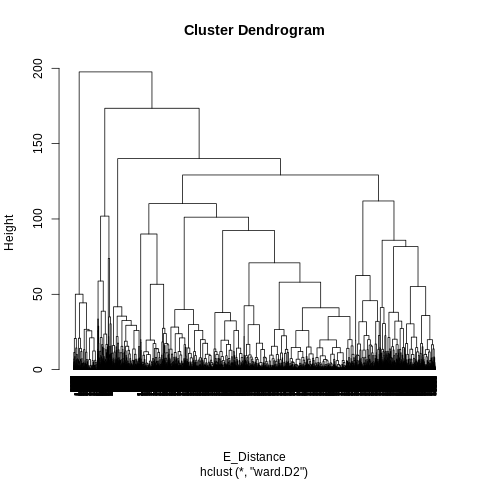

In [ ]:
%%R
#Plotting a Dendogram of the results
plot(res.hc, cex = 0.6, hang = -1)

# 3.DBSCAN Clustering

In [ ]:
%%R
install.packages("dbscan")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dbscan_1.1-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1108993 bytes (1.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R
library("dbscan")

In [ ]:
%%R
db<-dbscan(my_data_Norm,eps=0.4,MinPts = 0)

R[write to console]: Error in dbscan(my_data_Norm, eps = 0.4, MinPts = 0) : 
  data/distances cannot contain NAs for dbscan (with kd-tree)!
Calls: <Anonymous> -> <Anonymous> -> withVisible -> dbscan

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In dbscan(my_data_Norm, eps = 0.4, MinPts = 0) :
R[write to console]: 
 
R[write to console]:  converting argument MinPts (fpc) to minPts (dbscan)!




Error in dbscan(my_data_Norm, eps = 0.4, MinPts = 0) : 
  data/distances cannot contain NAs for dbscan (with kd-tree)!
Calls: <Anonymous> -> <Anonymous> -> withVisible -> dbscan


In [ ]:
%%R
print(db)

R[write to console]: Error in print(db) : object 'db' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> print




Error in print(db) : object 'db' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> print


In [ ]:
%%R
hullplot(my_data_Norm,db$cluster)

R[write to console]: Error in svd(x, nu = 0, nv = k) : infinite or missing values in 'x'
Calls: <Anonymous> ... withVisible -> hullplot -> prcomp -> prcomp.default -> svd




Error in svd(x, nu = 0, nv = k) : infinite or missing values in 'x'
Calls: <Anonymous> ... withVisible -> hullplot -> prcomp -> prcomp.default -> svd


# 4.KNN

In [ ]:
%%R
Train <- my_data_Norm[1:10000, ]
Test <- my_data_Norm[10001:12320, ]
Train_labels <- Train[1:10000, 1]
Test_labels <- Test[10001:12320, 1]

In [ ]:
%%R
Test_pred <- knn(train = Train, test = Test,
                      cl = Train_labels, k = 21)
Test_pred

In [ ]:
#Model Evaluation
%%R
t<-table(factor(Test_pred))
t
t1<-table(Test_labels,Test_pred)
t1

# 5.Decision Trees

In [ ]:
%%R
#Installing libraries
install.packages('rpart')
install.packages('caret')
install.packages('rpart.plot')
install.packages('rattle')
 
#Loading libraries
library(rpart,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)

In [ ]:
%%R
tree <- rpart(class~.,
data=Train,
parms = list(loss = penalty.matrix),
method = "class")

# 6.SVM

In [ ]:
%%R
install.packages('caret')
install.packages('kernlab')

In [ ]:
%%R
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Train$Revenue ~., data =Train, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)


In [ ]:
%%R
svm_Linear

In [ ]:
%%R
test_pred <- predict(svm_Linear, newdata = Test)
test_pred

In [ ]:
%%R
confusionMatrix(table(test_pred, Test$Revenue)

# 7.Naive Bayes

In [ ]:
# Checking dimensions of the split
%%R
prop.table(table(df_n$Revenue)) * 100
prop.table(table(df_n$Revenue)) * 100
prop.table(table(df_n$Revenue)) * 100


In [ ]:
%%R
x = Train[,-6]
y = Train$Revenue

In [ ]:
%%R
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

In [ ]:
# Predicting our testing set
# 
%%R
Predict <- predict(model,newdata = Test )

In [ ]:
%%R
confusionMatrix(Predict, testing$Revenue)

# Summary of Observations and Recommendations

1. From the barplot it is clear that most of the site vistis are made in May and Novemeber hence these should be the priority months in terms of marketing in the organization. The top 5 months are as follows:

    May
    Novemeber
    March
    December
    October.

The Organization should seek to establish religious and cultural events that occur in these months in the different branches such as Christmas,etc and capitalize in using them in their marketing.

2. From the Analysis,most of the visitors to the site are Returning Visistors an indication that clients are happy with the products and customer service.The organization should therefor look at ways of motivating these returning visitors through loyalty cards that accumulate points over time.

Secondly, the organization should capitalize efforts in finding new clients as this group seems to be lagging behind.This could include more advertisement on the mainstream and social media avenues.Additionally,the organization should look at working with influencers in the different regions.

3.From the analysis it is clear that most of the customers visit the sites on week dayas and not on weekends as it is popularly known.The organization should therefore focus on giving discounts and promoting their products on week days.

4. A shocking revelation is revealed by the above plot whereby most of the site visits do not result into revenue.Revenue is the main aim of any business hence the traffic on the site should result into revenue.

Perhaps this is an indication that most people have heard about the brand but when they visit the site the prices are not affordable or the quality of the products is not as expected.The Organization should therefore seek to find out why this is the case;maybe conduct a survey among the individuals who visite the site and did not purchase any product.

Additionally,the organization should consider revamping their website to include pop up questions to direct the customers.

I visited the website and found out that the website is in Russia which put me off in trying to navigate the website as I didn't understand the language.The oranization should therefore customize its website in English so as to attract customers from all over the world.This could be one of the reasons why the the revenue does not resonate with the number of site visits.

5. The most prevalent traffic type is the type 2.The top 5 types are as follows:

1. 2
2. 1
3. 3
4. 4
5. 13

6. There are positive covariance relations between the following Variables:
1. Page Values and Opearating Systems
2. Page Values and Browser
3. Page Values and Region
4. Page Values and TrafficType
5. Special Day and Operating Systems
6. Special Day and Browser
7. Special Day and TrafficType
8. Operating Systems and Browser
9. Operating Systems and Region
10. Operating Systems and TrafficType
11. ...etc

The rest indicate negative or no covariance relationships.

7.Most of the site visits come from region one foollowed by region 3,region 4,region 2 and region 6.

8. Most of the clients have operating system 2.

9. There is a positive linear relationship between the Exit and Bounce rates



# Comaprison between K-means and Hieararchical Clustering

**Disadvantages of K-mean Clustering**

1. Difficult    to    predict    the    number    of    clusters    (K-­‐Value)    •IniHal    seeds    have    a    strong    impact    on    the    final    results    
2.  The    order    of    the    data    has    an    impact    on    the    final    results    

3. SensiHve    to    scale:    rescaling    your    datasets    (normalizaHon    or    standardizaHon)    will    completely    change    results.    While    this    itself    is    not    bad,    not    realizing    that    you    have    to    spend    extra    a4en(on    to    scaling    your    data    might    be    bad.        

**Disadvantages of Hierarchical Clustering**

1. It    is    not    possible    to    undo    the    previous    step:    once    the    instances    have    been    assigned    to    a    cluster,    they    can    no    longer    be    moved    around.        
2. Time    complexity:    not    suitable    for    large    datasets    •IniHal    seeds    have    a    strong    impact    on    the    final    results  
3. The    order    of    the    data    has    an    impact    on    the    final    results    
4. Very    sensitive    to    outlier